<a href="https://colab.research.google.com/github/maacunap76/Especiaizacion_ML_Deep_DMC/blob/main/Supervised_models/Linear_regression/Lab_Boston_Housing_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


<h1 align=center><font size = 5>Boston Housing</font></h1>

---

## Introducción


En este laboratorio, aprenderá a usar python para construir un modelo de regresión.


<h3>Objetivo de este Notebook<h3>    
<h5> 1. Como construir e interpretar un modelo de regresión.</h5>
<h5> 2. Descargar y limpiar un Dataset </h5>
<h5> 3. Realizar los pasos necesarios previos a la etapa de modelamiento </h5>
<h5> 4. Entrenar y Testear modelo </h5>     

## Tabla de Contenidos

<div class="alert alert-block alert-info" style="margin-top: 20px">

<font size = 3>
    
1. <a href="#item31">Importar Librerías</a>  
2. <a href="#item32">Descargar y limpiar el Dataset</a>  
3. <a href="#item33">Pre-selección de variables</a> 
4. <a href="#item33">Preparación de datos</a> 
5. <a href="#item33">Construir un modelo de regresión lineal</a>  
6. <a href="#item34">Entrenar y Testear el modelo</a>  

</font>
</div>

## Descargar y limpiar Dataset


Primero, importemos algunos módulos comunes, asegurémonos de que MatplotLib tenga una configuración adecuada para el tamaño de nuestros gráficos. También verificamos que Python 3.5 o posterior esté instalado (aunque Python 2.x puede funcionar, está obsoleto), así como Scikit-Learn ≥0.20.

In [29]:
# Scikit-Learn 
import sklearn

# Imports comunes
import pandas as pd
import numpy as np
import os

# Configuración de tamaño de gráficos matplotlib
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Cargar seaborn 
import seaborn as sns
sns.set(style="whitegrid", color_codes = True)
sns.set(rc={'figure.figsize':(10,6)})

# Ignore las advertencias poco útiles
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

<b>Valores de la vivienda en los suburbios de Boston</b>

<h5>La variable <b>medv</b> es la variable objetivo.</h5>

<b>Descripción de datos</b>

El data frame de Boston tiene 506 filas y 14 columnas.

<b>Este data frame contiene las siguientes columnas:</b>

---

* <b>crim : </b> Tasa de criminalidad per cápita por ciudad.

* <b>zn : </b> Proporción de terreno residencial dividido en zonas para lotes de más de 25,000 pies cuadrados.

* <b>indus : </b> Proporción de acres comerciales no minoristas por ciudad.

* <b>chas : </b> Variable ficticia de Charles River (= 1 si el tramo limita con el río; 0 en caso contrario).

* <b>nox : </b>Concentración de óxidos de nitrógeno (partes por 10 millones).

* <b>rm : </b>Número medio de habitaciones por vivienda.

* <b>años : </b> Proporción de unidades ocupadas por sus propietarios construidas antes de 1940.

* <b>dis : </b>Media ponderada de las distancias a cinco centros de empleo de Boston.

* <b>rad : </b>Indice de accesibilidad a carreteras radiales.

* <b>impuesto : </b>Tasa de impuesto a la propiedad de valor total por \$ 10,000.

* <b>ptratio : </b>Proporción alumno-profesor por ciudad.

* <b>black : </b> 1000 (Bk - 0.63) ^ 2 donde Bk es la proporción de negros por ciudad.

* <b>lstat : </b>Estatus más bajo de la población (porcentaje).

* <b>medv : </b>Valor medio de las viviendas ocupadas por sus propietarios en \$ 1000.

---

<strong>Puede consultar este [link](https://kaggle.com/c/boston-housing) para leer más sobre la fuente de datos boston housing.</strong>

<strong>Puede descargar la data en este [link](https://www.kaggle.com/datasets/altavish/boston-housing-dataset)</strong>


## 1. Leyendo y Explorando data

In [30]:
#cargamos la data

pddf = pd.read_csv('/HousingData2.csv')

In [31]:
pddf.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [32]:
pddf.shape

(506, 14)

In [33]:
# Vamos a describir la información
#pddf.describe()
pddf.describe().transpose()


,count,mean,std,min,25%,50%,75%,max
CRIM,486.0,3.611874,8.720192,0.00632,0.081900,0.253715,3.560263,88.9762
ZN,486.0,11.211934,23.388876,0.00000,0.000000,0.000000,12.500000,100.0000
INDUS,486.0,11.083992,6.835896,0.46000,5.190000,9.690000,18.100000,27.7400
CHAS,486.0,0.069959,0.255340,0.00000,0.000000,0.000000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.538000,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.208500,6.623500,8.7800
AGE,486.0,68.518519,27.999513,2.90000,45.175000,76.800000,93.975000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.207450,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.000000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.000000,666.000000,711.0000


In [8]:
pddf.MEDV.mean()

22.532806324110677

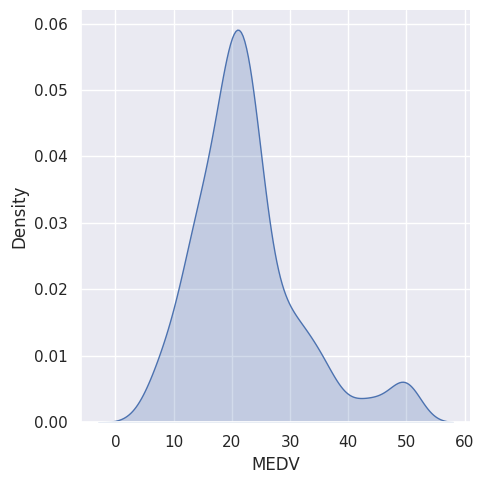

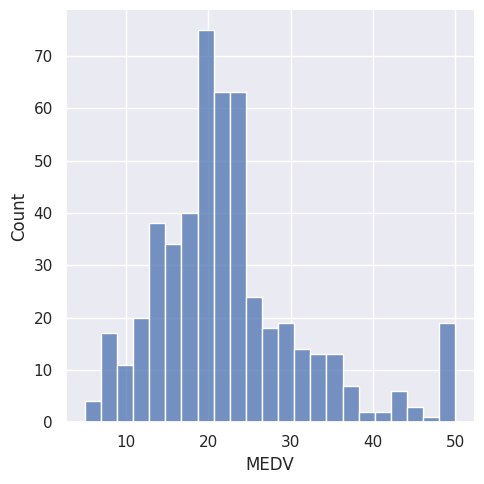

In [34]:
# Gráfico de distribución 
import seaborn as sns
sns.displot(pddf.MEDV, kind="kde", fill=True)
sns.displot(pddf.MEDV,  fill=True)

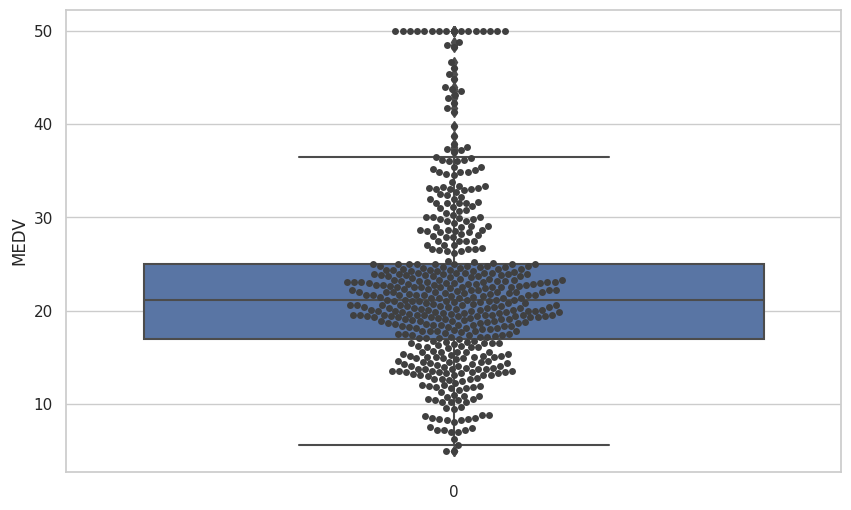

In [35]:
#Boxplot
sns.set_theme(style="whitegrid")
ax = sns.boxplot(data=pddf.MEDV, orient="v")
ax = sns.swarmplot(data=pddf.MEDV, color=".25")


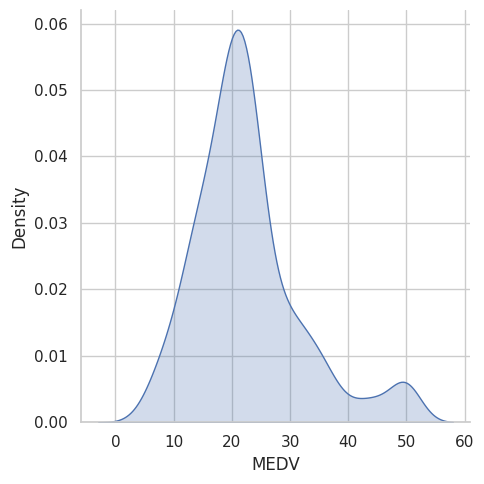

In [36]:
sns.displot(pddf.MEDV, kind="kde", fill=True)

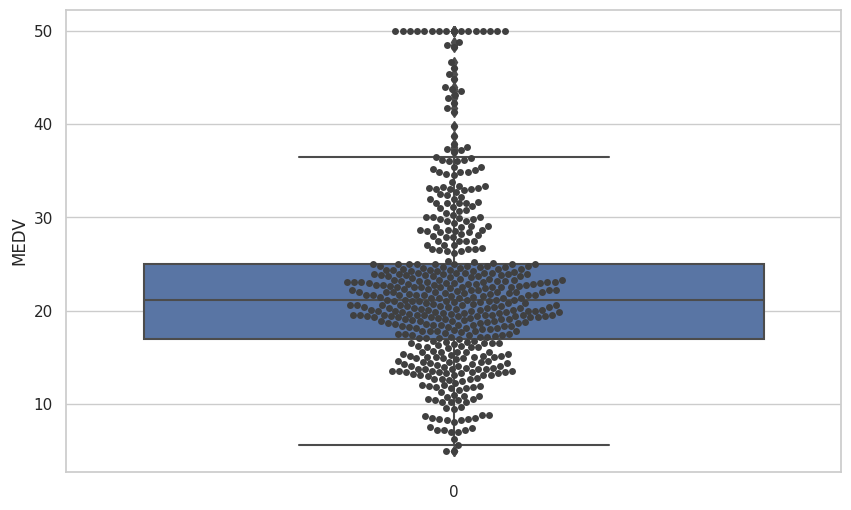

In [37]:
sns.set_theme(style="whitegrid")
ax = sns.boxplot(data=pddf.MEDV, orient="v")
ax = sns.swarmplot(data=pddf.MEDV, color=".25")

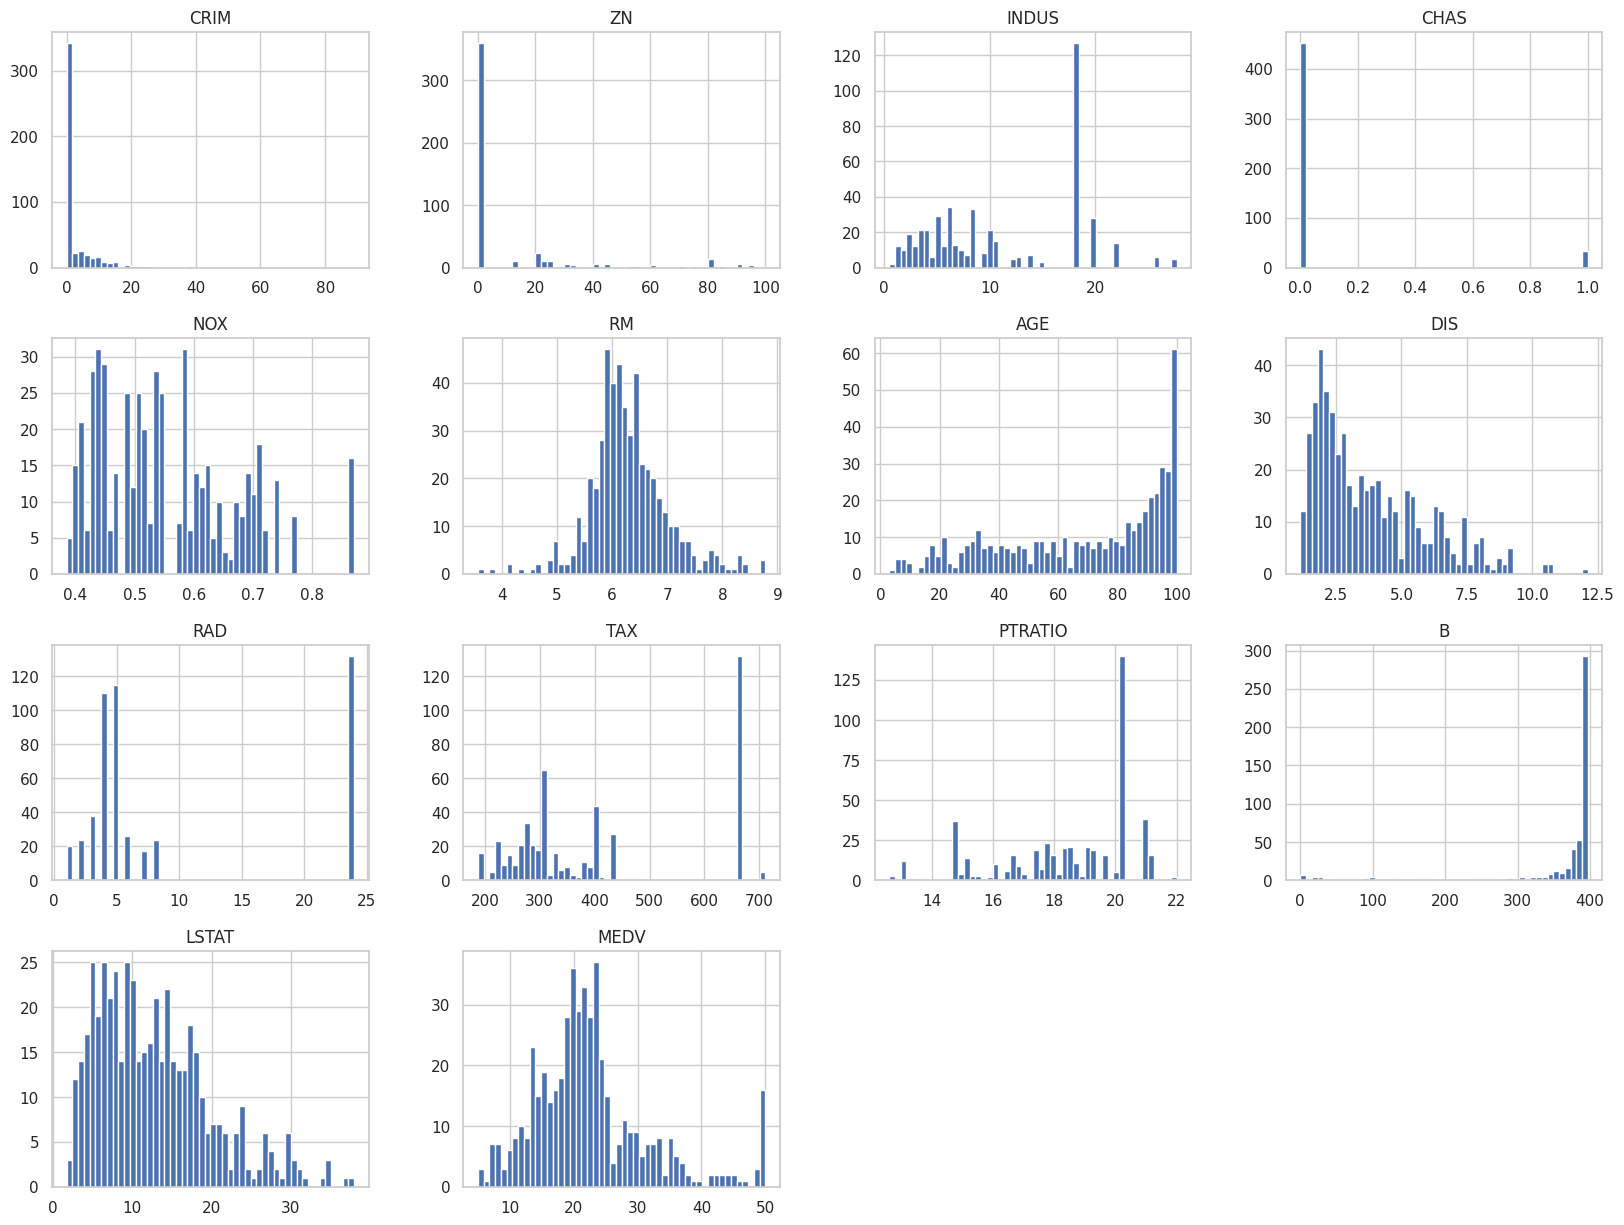

In [38]:
%matplotlib inline
import matplotlib.pyplot as plt
pddf.hist(bins=50, figsize=(20,15))
plt.show()

## 2. Selección de muestras

In [39]:
pddf.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [40]:
# Shuffle the data
from sklearn.utils import shuffle
pddf = shuffle(pddf, random_state = 123)


In [41]:
pddf.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
410,51.13580,0.0,18.10,0.0,0.5970,5.757,100.0,1.4130,24,666,20.2,2.60,10.11,15.0
85,0.05735,0.0,4.49,0.0,0.4490,6.630,56.1,4.4377,3,247,18.5,392.30,6.53,26.6
280,0.03578,20.0,3.33,0.0,0.4429,7.820,64.5,4.6947,5,216,14.9,387.31,3.76,45.4
422,12.04820,0.0,18.10,0.0,0.6140,5.648,87.6,1.9512,24,666,20.2,291.55,14.10,20.8
199,0.03150,95.0,1.47,0.0,0.4030,6.975,15.3,7.6534,3,402,17.0,396.90,4.56,34.9


In [42]:
# Elección de variables
#features = list(set(pddf.columns.tolist()) - set(['MEDV']))
#features


In [18]:
# Definiendo data
#X = pddf[features]
#y = pddf.MEDV


In [43]:
# Muestreo

from sklearn.model_selection import train_test_split

#X_train, X_test, y_train, y_test = train_test_split(X, y, 
 #                                                   train_size = 0.7, 
 #                                                   random_state = 123)
train , test = train_test_split(pddf, 
                                                    train_size = 0.7, 
                                                    random_state = 123)#semilla

In [44]:
#print(X.shape)
#print(X_train.shape)
#print(X_test.shape)

print(pddf.shape)
print(train.shape)
print(test.shape)


(506, 14)
(354, 14)
(152, 14)


Text(0, 0.5, 'precio del inmueble')

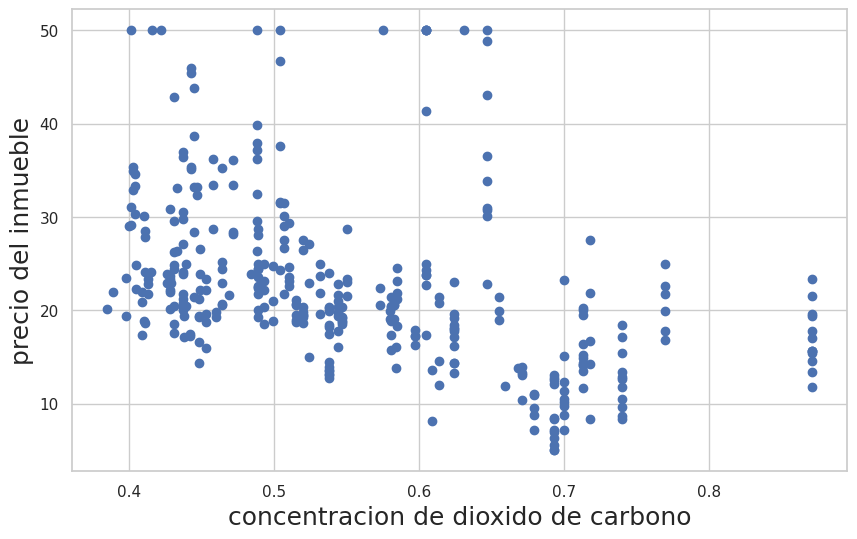

In [45]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,6)

#plt.scatter(X_train.NOX, y_train)
#plt.xlabel("$x_1$", fontsize=18)
#plt.ylabel("$y$", rotation=0, fontsize=18)

plt.scatter(train.NOX, train.MEDV)
plt.xlabel("concentracion de dioxido de carbono", fontsize=18)
plt.ylabel("precio del inmueble", rotation=90, fontsize=18)

In [46]:
train[['NOX','MEDV']].corr()

,NOX,MEDV
NOX,1.000000,-0.431853
MEDV,-0.431853,1.000000


array([[<Axes: xlabel='CRIM', ylabel='CRIM'>,
        <Axes: xlabel='ZN', ylabel='CRIM'>,
        <Axes: xlabel='INDUS', ylabel='CRIM'>,
        <Axes: xlabel='CHAS', ylabel='CRIM'>,
        <Axes: xlabel='NOX', ylabel='CRIM'>,
        <Axes: xlabel='RM', ylabel='CRIM'>,
        <Axes: xlabel='AGE', ylabel='CRIM'>,
        <Axes: xlabel='DIS', ylabel='CRIM'>,
        <Axes: xlabel='RAD', ylabel='CRIM'>,
        <Axes: xlabel='TAX', ylabel='CRIM'>,
        <Axes: xlabel='PTRATIO', ylabel='CRIM'>,
        <Axes: xlabel='B', ylabel='CRIM'>,
        <Axes: xlabel='LSTAT', ylabel='CRIM'>,
        <Axes: xlabel='MEDV', ylabel='CRIM'>],
       [<Axes: xlabel='CRIM', ylabel='ZN'>,
        <Axes: xlabel='ZN', ylabel='ZN'>,
        <Axes: xlabel='INDUS', ylabel='ZN'>,
        <Axes: xlabel='CHAS', ylabel='ZN'>,
        <Axes: xlabel='NOX', ylabel='ZN'>,
        <Axes: xlabel='RM', ylabel='ZN'>,
        <Axes: xlabel='AGE', ylabel='ZN'>,
        <Axes: xlabel='DIS', ylabel='ZN'>,
        <Axes: x

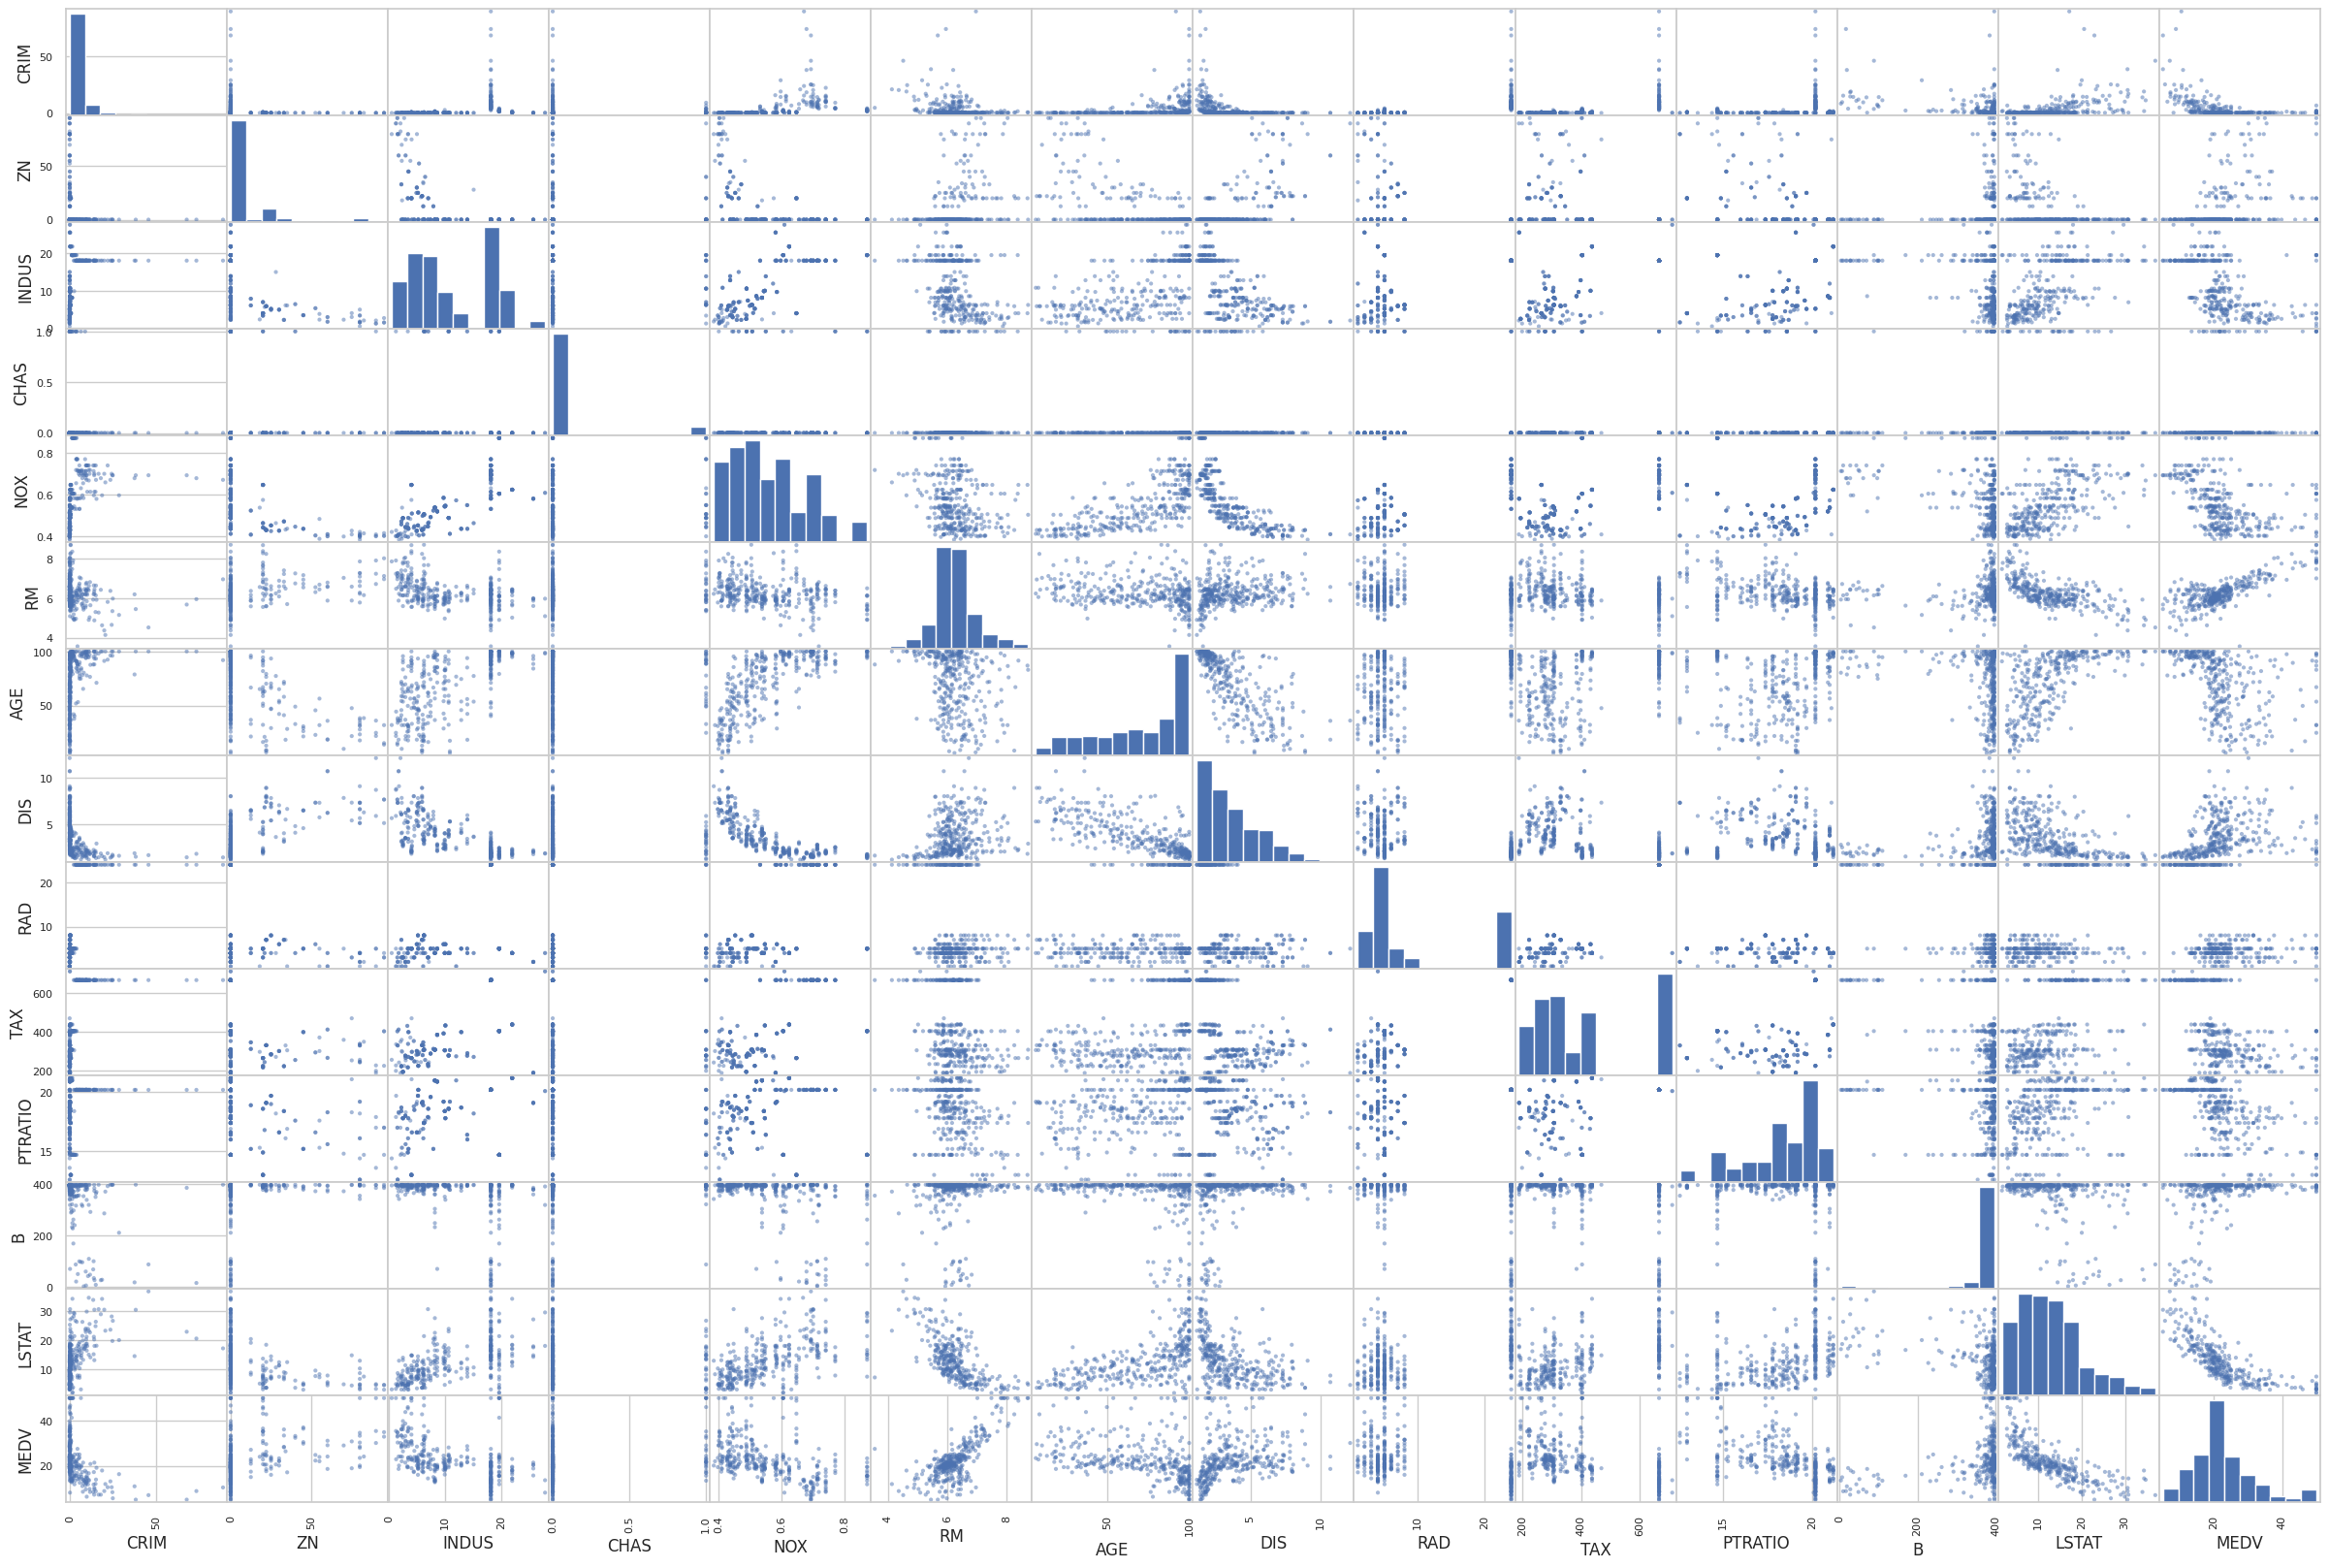

In [47]:
# Matriz de scatterplots  --grafico de correlacion de todas las variables contra todas
from pandas.plotting import scatter_matrix
scatter_matrix(train, figsize=(30, 20))

In [28]:
#plt.scatter(X_train.NOX, y_train, alpha = 0.5)
#plt.xlabel("$x_1$", fontsize=18)
#plt.ylabel("$y$", rotation=0, fontsize=18)
#plt.show()

In [55]:
pdResume= train.describe().transpose()

In [56]:
pdResume

,count,mean,std,min,25%,50%,75%,max
CRIM,342.0,3.746143,9.304820,0.00632,0.082492,0.25293,3.48152,88.9762
ZN,339.0,10.228614,21.895227,0.00000,0.000000,0.00000,6.25000,95.0000
INDUS,338.0,11.082751,6.868390,0.46000,5.130000,9.69000,18.10000,27.7400
CHAS,340.0,0.079412,0.270779,0.00000,0.000000,0.00000,0.00000,1.0000
NOX,354.0,0.557487,0.119214,0.38500,0.453000,0.53800,0.64700,0.8710
RM,354.0,6.276766,0.705929,3.56100,5.878250,6.18500,6.60175,8.7250
AGE,339.0,69.912094,27.237846,6.20000,48.350000,78.10000,94.65000,100.0000
DIS,354.0,3.716495,2.029466,1.17420,2.080825,3.14230,5.00235,12.1265
RAD,354.0,9.398305,8.589281,1.00000,4.000000,5.00000,20.00000,24.0000
TAX,354.0,402.813559,167.121147,187.00000,277.000000,330.00000,666.00000,711.0000


In [58]:
pdResume= train.describe().transpose()
pdResume.reset_index(inplace =True)

In [59]:
pdResume

,index,count,mean,std,min,25%,50%,75%,max
0,CRIM,342.0,3.746143,9.304820,0.00632,0.082492,0.25293,3.48152,88.9762
1,ZN,339.0,10.228614,21.895227,0.00000,0.000000,0.00000,6.25000,95.0000
2,INDUS,338.0,11.082751,6.868390,0.46000,5.130000,9.69000,18.10000,27.7400
3,CHAS,340.0,0.079412,0.270779,0.00000,0.000000,0.00000,0.00000,1.0000
4,NOX,354.0,0.557487,0.119214,0.38500,0.453000,0.53800,0.64700,0.8710
5,RM,354.0,6.276766,0.705929,3.56100,5.878250,6.18500,6.60175,8.7250
6,AGE,339.0,69.912094,27.237846,6.20000,48.350000,78.10000,94.65000,100.0000
7,DIS,354.0,3.716495,2.029466,1.17420,2.080825,3.14230,5.00235,12.1265
8,RAD,354.0,9.398305,8.589281,1.00000,4.000000,5.00000,20.00000,24.0000
9,TAX,354.0,402.813559,167.121147,187.00000,277.000000,330.00000,666.00000,711.0000


## 3. Pre-selección de variables

In [60]:
# Dando formato a nuestra tabla resumen

pdResume = train.describe().transpose()
pdResume.reset_index(inplace = True)
pdResume.rename(columns = {'index' : 'feature',
                           '25%' : 'Q1',
                           '50%' : 'median',
                           '75%' : 'Q3'}, inplace = True)


In [61]:
pdResume

,feature,count,mean,std,min,Q1,median,Q3,max
0,CRIM,342.0,3.746143,9.304820,0.00632,0.082492,0.25293,3.48152,88.9762
1,ZN,339.0,10.228614,21.895227,0.00000,0.000000,0.00000,6.25000,95.0000
2,INDUS,338.0,11.082751,6.868390,0.46000,5.130000,9.69000,18.10000,27.7400
3,CHAS,340.0,0.079412,0.270779,0.00000,0.000000,0.00000,0.00000,1.0000
4,NOX,354.0,0.557487,0.119214,0.38500,0.453000,0.53800,0.64700,0.8710
5,RM,354.0,6.276766,0.705929,3.56100,5.878250,6.18500,6.60175,8.7250
6,AGE,339.0,69.912094,27.237846,6.20000,48.350000,78.10000,94.65000,100.0000
7,DIS,354.0,3.716495,2.029466,1.17420,2.080825,3.14230,5.00235,12.1265
8,RAD,354.0,9.398305,8.589281,1.00000,4.000000,5.00000,20.00000,24.0000
9,TAX,354.0,402.813559,167.121147,187.00000,277.000000,330.00000,666.00000,711.0000


In [62]:
train.shape

(354, 14)

In [63]:
pdResume[['missing_rate']] = 1 - pdResume[['count']]/train.shape[0]
pdResume.sort_values(by = 'missing_rate', ascending = False, inplace = True)


In [64]:
pdResume

,feature,count,mean,std,min,Q1,median,Q3,max,missing_rate
2,INDUS,338.0,11.082751,6.868390,0.46000,5.130000,9.69000,18.10000,27.7400,0.045198
1,ZN,339.0,10.228614,21.895227,0.00000,0.000000,0.00000,6.25000,95.0000,0.042373
6,AGE,339.0,69.912094,27.237846,6.20000,48.350000,78.10000,94.65000,100.0000,0.042373
12,LSTAT,339.0,12.945015,7.195009,1.73000,7.435000,11.74000,17.10000,36.9800,0.042373
3,CHAS,340.0,0.079412,0.270779,0.00000,0.000000,0.00000,0.00000,1.0000,0.039548
0,CRIM,342.0,3.746143,9.304820,0.00632,0.082492,0.25293,3.48152,88.9762,0.033898
4,NOX,354.0,0.557487,0.119214,0.38500,0.453000,0.53800,0.64700,0.8710,0.000000
5,RM,354.0,6.276766,0.705929,3.56100,5.878250,6.18500,6.60175,8.7250,0.000000
7,DIS,354.0,3.716495,2.029466,1.17420,2.080825,3.14230,5.00235,12.1265,0.000000
8,RAD,354.0,9.398305,8.589281,1.00000,4.000000,5.00000,20.00000,24.0000,0.000000


In [71]:
correlations= train.corr()
correlations

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.178657,0.388246,-0.070936,0.404013,-0.203718,0.339131,-0.357050,0.611013,0.572931,0.276978,-0.356568,0.442098,-0.411684
ZN,-0.178657,1.000000,-0.521346,-0.021569,-0.487448,0.329174,-0.553154,0.635262,-0.292986,-0.291606,-0.406099,0.151702,-0.406697,0.373788
INDUS,0.388246,-0.521346,1.000000,0.036160,0.756209,-0.391341,0.628738,-0.683186,0.589795,0.709395,0.375618,-0.329201,0.595585,-0.512475
CHAS,-0.070936,-0.021569,0.036160,1.000000,0.046939,0.097471,0.065457,-0.074271,-0.051367,-0.084635,-0.140622,0.053099,-0.023123,0.163915
NOX,0.404013,-0.487448,0.756209,0.046939,1.000000,-0.300891,0.713841,-0.767061,0.598581,0.657181,0.149073,-0.367191,0.582571,-0.431853
RM,-0.203718,0.329174,-0.391341,0.097471,-0.300891,1.000000,-0.257014,0.201934,-0.232941,-0.310378,-0.384552,0.103654,-0.646400,0.763989
AGE,0.339131,-0.553154,0.628738,0.065457,0.713841,-0.257014,1.000000,-0.746353,0.423966,0.464550,0.232307,-0.249902,0.610389,-0.397317
DIS,-0.357050,0.635262,-0.683186,-0.074271,-0.767061,0.201934,-0.746353,1.000000,-0.459574,-0.496149,-0.193537,0.260822,-0.495655,0.261302
RAD,0.611013,-0.292986,0.589795,-0.051367,0.598581,-0.232941,0.423966,-0.459574,1.000000,0.915424,0.470816,-0.415609,0.482407,-0.447186
TAX,0.572931,-0.291606,0.709395,-0.084635,0.657181,-0.310378,0.464550,-0.496149,0.915424,1.000000,0.461043,-0.418384,0.535433,-0.523892


In [75]:
correlations = train.corr()[['MEDV']]
correlations.reset_index(inplace = True)
correlations.rename(columns = {'index' : 'feature',
                               'MEDV' : 'corr'}, inplace = True)
correlations

,feature,corr
0,CRIM,-0.411684
1,ZN,0.373788
2,INDUS,-0.512475
3,CHAS,0.163915
4,NOX,-0.431853
5,RM,0.763989
6,AGE,-0.397317
7,DIS,0.261302
8,RAD,-0.447186
9,TAX,-0.523892


In [ ]:
# Calculando las correlaciones de todas las variables con el target

#temp = X_train.copy()
#temp['target'] = y_train

#correlations = []
#for col in features:
 # correlations.append(temp[[col, 'target']].corr().iloc[0][1])


In [76]:
pdResume2 = pd.merge(pdResume, correlations, on = 'feature')

In [77]:
pdResume2

,feature,count,mean,std,min,Q1,median,Q3,max,missing_rate,corr
0,INDUS,338.0,11.082751,6.868390,0.46000,5.130000,9.69000,18.10000,27.7400,0.045198,-0.512475
1,ZN,339.0,10.228614,21.895227,0.00000,0.000000,0.00000,6.25000,95.0000,0.042373,0.373788
2,AGE,339.0,69.912094,27.237846,6.20000,48.350000,78.10000,94.65000,100.0000,0.042373,-0.397317
3,LSTAT,339.0,12.945015,7.195009,1.73000,7.435000,11.74000,17.10000,36.9800,0.042373,-0.751647
4,CHAS,340.0,0.079412,0.270779,0.00000,0.000000,0.00000,0.00000,1.0000,0.039548,0.163915
5,CRIM,342.0,3.746143,9.304820,0.00632,0.082492,0.25293,3.48152,88.9762,0.033898,-0.411684
6,NOX,354.0,0.557487,0.119214,0.38500,0.453000,0.53800,0.64700,0.8710,0.000000,-0.431853
7,RM,354.0,6.276766,0.705929,3.56100,5.878250,6.18500,6.60175,8.7250,0.000000,0.763989
8,DIS,354.0,3.716495,2.029466,1.17420,2.080825,3.14230,5.00235,12.1265,0.000000,0.261302
9,RAD,354.0,9.398305,8.589281,1.00000,4.000000,5.00000,20.00000,24.0000,0.000000,-0.447186


In [ ]:
# Cruzando correlaciones con la tabla de resumen original

#pdres_cor = pd.DataFrame({'feature' : features, 'corr_MEDV' : correlations})
#pdResume2 = pd.merge(pdResume, pdres_cor, on = 'feature')


In [ ]:
#pdResume2['abs_corr_MEDV'] = pdResume2.corr_MEDV.apply(lambda x: abs(x))
#pdResume2.sort_values(by = 'abs_corr_MEDV', ascending = False, inplace=True)

#pdResume2.head()

In [78]:
pdResume2['abs_corr'] = pdResume2['corr'].apply(lambda x: abs(x))#el apply hace funciones sobre la columna seleccionada en este caso corr
pdResume2.sort_values(by = 'abs_corr', ascending = False, inplace=True)

pdResume2.head()

,feature,count,mean,std,min,Q1,median,Q3,max,missing_rate,corr,abs_corr
13,MEDV,354.0,22.460452,9.188172,5.000,17.20000,20.800,25.00000,50.000,0.000000,1.000000,1.000000
7,RM,354.0,6.276766,0.705929,3.561,5.87825,6.185,6.60175,8.725,0.000000,0.763989,0.763989
3,LSTAT,339.0,12.945015,7.195009,1.730,7.43500,11.740,17.10000,36.980,0.042373,-0.751647,0.751647
11,PTRATIO,354.0,18.375706,2.194308,12.600,17.00000,18.800,20.20000,21.200,0.000000,-0.561413,0.561413
10,TAX,354.0,402.813559,167.121147,187.000,277.00000,330.000,666.00000,711.000,0.000000,-0.523892,0.523892


In [81]:
# Guardando resultados
pdResume2.to_csv('/univariate_assesment.csv', index = 0)#index = 0 es para que no salga el index en el dataset

## 4. Preparación de datos

<h3>Tratamiento de outliers</h3> 

### Outliers por Rango Intercuantílico

<img src="https://miro.medium.com/max/1400/1*2c21SkzJMf3frPXPAR_gZA.png" width="500" 
     height="300" > 

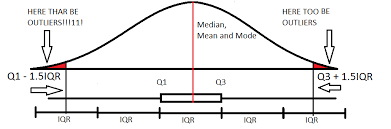 

In [ ]:
#Leyendo tabla resumen

univariate_II = pd.read_csv('univariate_assesment.csv')
univariate_II.head() 

In [ ]:
# Calculando los intervalos RIC

univariate_II['ric'] = univariate_II['Q3'] - univariate_II['Q1']

univariate_II['min_ric'] = univariate_II['Q1'] - 1.5*univariate_II['ric']
univariate_II['max_ric'] = univariate_II['Q3'] + 1.5*univariate_II['ric']

univariate_II.head() 

In [ ]:
# Tratamiento de outliers por RIC

for col in univariate_II.feature.tolist():
  desc = univariate_II.loc[univariate_II.feature == col]
  X_train[col + '_tric'] = X_train[col].apply(lambda x: desc.max_ric.values[0] if x > desc.max_ric.values[0]
                                                   else desc.min_ric.values[0] if x < desc.min_ric.values[0]
                                                   else x)

X_train.head()

Revisemos los resultados

In [ ]:
sns.displot(X_train, x = "CRIM", kind="kde", fill=True)

In [ ]:
sns.displot(X_train, x = "CRIM_tric", kind="kde", fill=True)

### Outliers por Z-score



<img src="https://editor.analyticsvidhya.com/uploads/440971.png" width="500" 
     height="300" > 

In [ ]:
univariate_II.head()

In [ ]:
# Calculando los intervalos Z-score

univariate_II['min_zscore'] = univariate_II['mean'] - 3*univariate_II['std']
univariate_II['max_zscore'] = univariate_II['mean'] + 3*univariate_II['std']

univariate_II.head() 

In [ ]:
# Tratamiento de outliers por Z-score

for col in univariate_II.feature.tolist():
  desc = univariate_II.loc[univariate_II.feature == col]
  X_train[col + '_tzscore'] = X_train[col].apply(lambda x: desc.max_zscore.values[0] if x > desc.max_zscore.values[0]
                                                   else desc.min_zscore.values[0] if x < desc.min_zscore.values[0]
                                                   else x)

X_train.head()

Revisemos los resultados

In [ ]:
sns.displot(X_train, x = "CRIM", kind="kde", fill=True)

In [ ]:
sns.displot(X_train, x = "CRIM_tzscore", kind="kde", fill=True)

In [ ]:
univariate_II.to_csv('univariate_assesment.csv', index = 0)

### Tratamiento de Missings

In [ ]:
all_features = X_train.columns.tolist()

In [ ]:
# Trataiento de missings

X_train[[x + '_imp' for x in all_features]] = X_train[all_features].fillna(X_train[all_features].median())


In [ ]:
X_train[[x + '_imp' for x in all_features]].head(30)

## 5. Modelo de regresión Lineal

### Rregresión lineal por máxima verosimilitud

In [ ]:
features_in = [x + '_imp' for x in all_features if ('_tric' in x) and ('CHAS' not in x)]


In [ ]:
# estandarizando las variables para mantener todas en una misma escala
X_train[[x + '_std' for x in features_in]] = (X_train[features_in] - X_train[features_in].mean())/X_train[features_in].std()


In [ ]:
X_train[[x + '_std' for x in features_in]]

In [ ]:
y_train

In [ ]:
import statsmodels.api as sm

# Fit and summarize OLS model
mod = sm.OLS(y_train, 
             sm.add_constant(X_train[[x + '_std' for x in features_in]]))
res = mod.fit()


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
print(res.summary())

In [ ]:
mod = sm.OLS(y_train, sm.add_constant(X_train[['RM_tric_imp_std',
                               'LSTAT_tric_imp_std',
                               #'PTRATIO_tric_imp',
                               'TAX_tric_imp_std',
                               'RAD_tric_imp_std',
                               'CRIM_tric_imp_std',
                               'NOX_tric_imp_std',
                               #'B_tric_imp',
                               'DIS_tric_imp_std']]))
res = mod.fit()
print(res.summary())

In [ ]:
mod = sm.OLS(y_train, sm.add_constant(X_train[['RM_tric_imp_std',
                               'LSTAT_tric_imp_std',
                               #'PTRATIO_tric_imp',
                               'TAX_tric_imp_std',
                               'RAD_tric_imp_std',
                               'CRIM_tric_imp_std',
                               #'NOX_tric_imp_std',
                               #'B_tric_imp',
                               'DIS_tric_imp_std']]))
res = mod.fit()
print(res.summary())

In [ ]:
mod = sm.OLS(y_train, sm.add_constant(X_train[['RM_tric_imp_std',
                               'LSTAT_tric_imp_std',
                               #'PTRATIO_tric_imp',
                               'TAX_tric_imp_std',
                               #'RAD_tric_imp_std',
                               'CRIM_tric_imp_std',
                               #'NOX_tric_imp_std',
                               #'B_tric_imp',
                               'DIS_tric_imp_std']]))
res = mod.fit()
print(res.summary())

In [ ]:
mod = sm.OLS(y_train, sm.add_constant(X_train[['RM_tric_imp_std',
                               #'LSTAT_tric_imp_std',
                               #'PTRATIO_tric_imp',
                               'TAX_tric_imp_std'
                               #'RAD_tric_imp_std',
                               #'CRIM_tric_imp_std',
                               #'NOX_tric_imp_std',
                               #'B_tric_imp',
                               #'DIS_tric_imp_std'
                               ]]))
res = mod.fit()
print(res.summary())


* <b>crim : </b> Tasa de criminalidad per cápita por ciudad.

* <b>rm : </b>Número medio de habitaciones por vivienda.

* <b>dis : </b>Media ponderada de las distancias a cinco centros de empleo de Boston.

* <b>ptratio : </b>Proporción alumno-profesor por ciudad.

* <b>lstat : </b>Estatus más bajo de la población (porcentaje).

* <b>black : </b> 1000 (Bk - 0.63) ^ 2 donde Bk es la proporción de negros por ciudad.



In [ ]:
X_train[['RM_tric_imp_std',
                               'LSTAT_tric_imp_std',
                               #'PTRATIO_tric_imp',
                               'TAX_tric_imp_std',
                               #'RAD_tric_imp_std',
                               #'CRIM_tric_imp_std',
                               #'NOX_tric_imp_std',
                               #'B_tric_imp',
                               'DIS_tric_imp_std']].corr()